In [36]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend

import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [41]:
features = pd.read_csv("/Users/kimjuhwan/Desktop/data/pamap2.csv", index_col=0)

In [42]:
select_hand=['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1','handAcc6_2', 'handAcc6_3', 'handGyro1','handGyro2','handGyro3','handMagne1','handMagne2','handMagne3']
h_features = features[select_hand]
select_chest=['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3','chestAcc6_1', 'chestAcc6_2','chestAcc6_3','chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3']
c_features = features[select_chest]

In [43]:
from sklearn.preprocessing import StandardScaler

hand_X = features[select_hand]
hand_y = features['activityID']

scaler = StandardScaler()
hand_X = scaler.fit_transform(hand_X)

scaled_hand_X = pd.DataFrame(data = hand_X, columns = [select_hand])
scaled_hand_X['label'] = hand_y.values

In [44]:
chest_X = features[select_chest]
chest_y = features['activityID']

scaler = StandardScaler()
chest_X = scaler.fit_transform(chest_X)

scaled_chest_X = pd.DataFrame(data = chest_X, columns = [select_chest])
scaled_chest_X['label'] = chest_y.values

In [45]:
from sklearn.model_selection import train_test_split

hand_X_train, hand_X_test, hand_y_train, hand_y_test = train_test_split(scaled_hand_X, 
                                                    scaled_hand_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [46]:
chest_X_train, chest_X_test, chest_y_train, chest_y_test = train_test_split(scaled_chest_X, 
                                                    scaled_chest_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [47]:
TIME_STEPS = 40
STEP = 10

In [48]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i+time_steps)].values
        labels = y.iloc[i:i+time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

hand_X_train, hand_y_train = create_dataset(hand_X_train, hand_y_train, TIME_STEPS,
                                  STEP)
hand_X_test, hand_y_test = create_dataset(hand_X_test, hand_y_test, TIME_STEPS,
                                  STEP)
print(hand_X_train.shape, hand_y_train.shape)

/var/folders/cf/560dzg5j06ndjd6b99gs0_rw0000gn/T/ipykernel_73261/658346896.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(589, 40, 13) (589, 1)


In [49]:
chest_X_train, chest_y_train = create_dataset(chest_X_train, chest_y_train, TIME_STEPS,
                                  STEP)
chest_X_test, chest_y_test = create_dataset(chest_X_test, chest_y_test, TIME_STEPS,
                                  STEP)
print(chest_X_train.shape, chest_y_train.shape)

/var/folders/cf/560dzg5j06ndjd6b99gs0_rw0000gn/T/ipykernel_73261/658346896.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(589, 40, 13) (589, 1)


In [50]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc.fit(hand_y_train)
enc2 = enc.fit(chest_y_train)

hand_y_train = enc1.transform(hand_y_train)
hand_y_test = enc1.transform(hand_y_test)
chest_y_train = enc2.transform(chest_y_train)
chest_y_test = enc2.transform(chest_y_test)

/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
print("hand_X_train.shape: ", hand_X_train.shape)
print("hand_X_test.shape ", hand_X_test.shape)
print("hand_y_train.shape ", hand_y_train.shape)
print("hand_y_test.shape ", hand_y_test.shape)

hand_X_train.shape:  (589, 40, 13)
hand_X_test.shape  (11256, 40, 13)
hand_y_train.shape  (589, 8)
hand_y_test.shape  (11256, 8)


In [52]:
print("chest_X_train.shape: ", chest_X_train.shape)
print("chest_X_test.shape ", chest_X_test.shape)
print("chest_y_train.shape ", chest_y_train.shape)
print("chest_y_test.shape ", chest_y_test.shape)

chest_X_train.shape:  (589, 40, 13)
chest_X_test.shape  (11256, 40, 13)
chest_y_train.shape  (589, 8)
chest_y_test.shape  (11256, 8)


In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [54]:
verbose,epochs,batch_size=1,10,32 

hand_n_timesteps,hand_n_features,hand_n_outputs=hand_X_train.shape[1],hand_X_train.shape[2],hand_y_train.shape[1]
chest_n_timesteps,chest_n_features,chest_n_outputs=chest_X_train.shape[1],chest_X_train.shape[2],chest_y_train.shape[1]

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [56]:
print(hand_n_timesteps,hand_n_features,hand_n_outputs)
print(chest_n_timesteps, chest_n_features, chest_n_outputs)

40 13 8
40 13 8


In [57]:
model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [hand_X_train.shape[1], hand_X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(hand_y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [58]:
history = model.fit(hand_X_train, hand_y_train, epochs =20, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/20
17/17 [==============================] - 3s 52ms/step - loss: 1.7677 - acc: 0.3302 - val_loss: 1.6533 - val_acc: 0.2712
Epoch 2/20
17/17 [==============================] - 0s 25ms/step - loss: 1.6758 - acc: 0.3453 - val_loss: 1.6452 - val_acc: 0.3390
Epoch 3/20
17/17 [==============================] - 0s 27ms/step - loss: 1.6147 - acc: 0.3887 - val_loss: 1.5547 - val_acc: 0.4407
Epoch 4/20
17/17 [==============================] - 0s 28ms/step - loss: 1.5184 - acc: 0.4547 - val_loss: 1.4790 - val_acc: 0.4407
Epoch 5/20
17/17 [==============================] - 0s 28ms/step - loss: 1.4762 - acc: 0.4358 - val_loss: 1.5282 - val_acc: 0.4576
Epoch 6/20
17/17 [==============================] - 0s 27ms/step - loss: 1.4296 - acc: 0.4755 - val_loss: 1.5047 - val_acc: 0.4237
Epoch 7/20
17/17 [==============================] - 0s 27ms/step - loss: 1.3998 - acc: 0.4698 - val_loss: 1.3802 - val_acc: 0.4746
Epoch 8/20
17/17 [==============================] - 0s 25ms/step - loss: 1.3714 - a

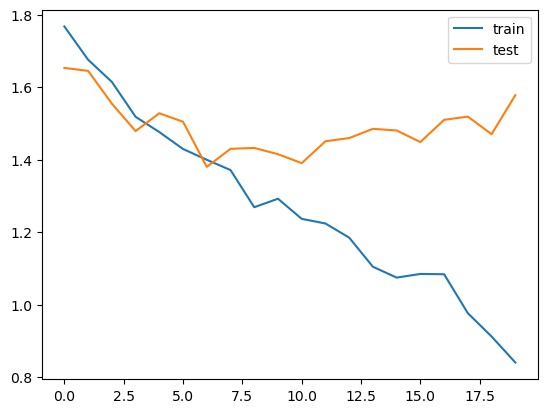

In [59]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [60]:
model.evaluate(hand_X_test, hand_y_test)
y_pred = model.predict(hand_X_test)

352/352 [==============================] - 4s 9ms/step


In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(hand_y_test,axis=1)
Y_pred = np.argmax(model.predict(hand_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

352/352 [==============================] - 3s 9ms/step
Confusion Matrix
[[1506  268  114  352    0  212    3    0]
 [ 546  258  161  492    0  403   11    0]
 [ 243  139  223  902    0  354    6    0]
 [ 360  177  400 1919    0  533   17    0]
 [   1    2    3   25    0   18    0    0]
 [ 150   87  104  447    0  547   13    0]
 [  16    1    4   48    0   88    3    0]
 [   3    0    1   16    0   77    3    0]]


In [62]:
%time
print(hand_X_test.shape,hand_y_test.shape)
base_loss,base_accuracy=model.evaluate(hand_X_test,hand_y_test,batch_size=batch_size,verbose=1)

cnn_file="/Users/kimjuhwan/Desktop/data/CNN_Model.h5"

tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at', cnn_file)
score=base_accuracy*100
print('Accuracy > {:f}'.format(score))
print('Base Loss > {:.2f}'.format(base_loss))

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 8.34 µs
(11256, 40, 13) (11256, 8)
352/352 [==============================] - 3s 9ms/step - loss: 1.6988 - acc: 0.3959
model saved at /Users/kimjuhwan/Desktop/data/CNN_Model.h5
Accuracy > 39.587775
Base Loss > 1.70


In [63]:
base_model = keras.models.load_model(cnn_file)

In [67]:
new_model=keras.models.Sequential(base_model.layers[:-1])
base_model.trainable = False
new_model.add(keras.layers.Dense(8, activation='softmax'))
new_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["accuracy"])

history2 = new_model.fit(chest_X_train,chest_y_train, epochs=3, batch_size=32,validation_split=0.1,shuffle=True)
new_model.summary()

Epoch 1/3
17/17 [==============================] - 2s 37ms/step - loss: 0.6593 - accuracy: 0.1358 - val_loss: 0.6674 - val_accuracy: 0.1525
Epoch 2/3
17/17 [==============================] - 0s 11ms/step - loss: 0.6543 - accuracy: 0.1113 - val_loss: 0.6622 - val_accuracy: 0.1525
Epoch 3/3
17/17 [==============================] - 0s 12ms/step - loss: 0.6472 - accuracy: 0.1264 - val_loss: 0.6572 - val_accuracy: 0.1525
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              145408    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                             

In [77]:
new_model = keras.models.Sequential(base_model.layers[:-1])
base_model.trainable = True
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(8,activation="sigmoid"))

new_model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])
history2 = new_model.fit(chest_X_train, chest_y_train, epochs=30, batch_size =32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/30
17/17 [==============================] - 3s 51ms/step - loss: 1.2632 - accuracy: 0.0170 - val_loss: 1.1909 - val_accuracy: 0.0000e+00
Epoch 2/30
17/17 [==============================] - 0s 26ms/step - loss: 1.1567 - accuracy: 0.0151 - val_loss: 1.0981 - val_accuracy: 0.0000e+00
Epoch 3/30
17/17 [==============================] - 0s 25ms/step - loss: 1.0662 - accuracy: 0.0208 - val_loss: 1.0166 - val_accuracy: 0.0169
Epoch 4/30
17/17 [==============================] - 0s 25ms/step - loss: 0.9875 - accuracy: 0.0264 - val_loss: 0.9450 - val_accuracy: 0.0169
Epoch 5/30
17/17 [==============================] - 0s 25ms/step - loss: 0.9157 - accuracy: 0.0358 - val_loss: 0.8782 - val_accuracy: 0.0169
Epoch 6/30
17/17 [==============================] - 0s 25ms/step - loss: 0.8579 - accuracy: 0.0434 - val_loss: 0.8155 - val_accuracy: 0.0339
Epoch 7/30
17/17 [==============================] - 0s 25ms/step - loss: 0.8021 - accuracy: 0.0377 - val_loss: 0.7628 - val_accuracy: 0.0508
Epoch

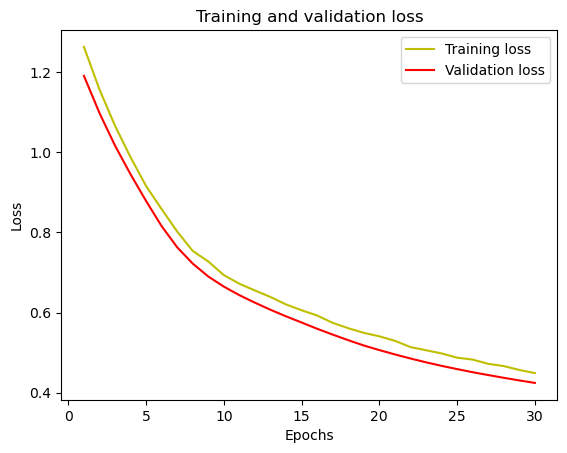

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

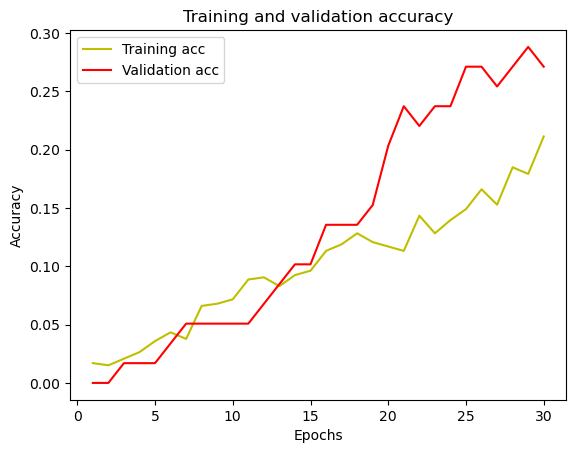

In [79]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
new_model.evaluate(chest_X_test, chest_y_test)
y_pred = new_model.predict(chest_X_test)

352/352 [==============================] - 4s 10ms/step


In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(chest_y_test,axis=1)
Y_pred = np.argmax(new_model.predict(chest_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

352/352 [==============================] - 3s 9ms/step
Confusion Matrix
[[ 475 1195    2  655   18  110    0    0]
 [  91 1312    0  407   16   45    0    0]
 [  74 1318    0  418   13   43    0    1]
 [  85 2546    1  638   34  102    0    0]
 [   1   33    0   10    3    2    0    0]
 [  16 1050    0  221   12   49    0    0]
 [   3  131    0   18    1    7    0    0]
 [   0   82    0   14    0    4    0    0]]


In [87]:
model2 = keras.Sequential()
model2.add(Bidirectional(LSTM(units = 128, input_shape = [hand_X_train.shape[1], hand_X_train.shape[2]])))
model2.add(Dropout(rate = 0.5))
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dense(hand_y_train.shape[1], activation = "softmax"))
model2.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [88]:
history = model2.fit(hand_X_train, hand_y_train, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
17/17 [==============================] - 3s 51ms/step - loss: 1.8257 - acc: 0.3170 - val_loss: 1.6418 - val_acc: 0.3390
Epoch 2/10
17/17 [==============================] - 0s 25ms/step - loss: 1.6835 - acc: 0.3566 - val_loss: 1.6541 - val_acc: 0.2712
Epoch 3/10
17/17 [==============================] - 0s 25ms/step - loss: 1.6423 - acc: 0.3811 - val_loss: 1.6380 - val_acc: 0.3051
Epoch 4/10
17/17 [==============================] - 0s 25ms/step - loss: 1.5834 - acc: 0.4132 - val_loss: 1.5235 - val_acc: 0.4576
Epoch 5/10
17/17 [==============================] - 0s 26ms/step - loss: 1.5029 - acc: 0.4434 - val_loss: 1.5315 - val_acc: 0.4237
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 1.4501 - acc: 0.4547 - val_loss: 1.4240 - val_acc: 0.4746
Epoch 7/10
17/17 [==============================] - 0s 25ms/step - loss: 1.4059 - acc: 0.4774 - val_loss: 1.4384 - val_acc: 0.4576
Epoch 8/10
17/17 [==============================] - 0s 25ms/step - loss: 1.3446 - a

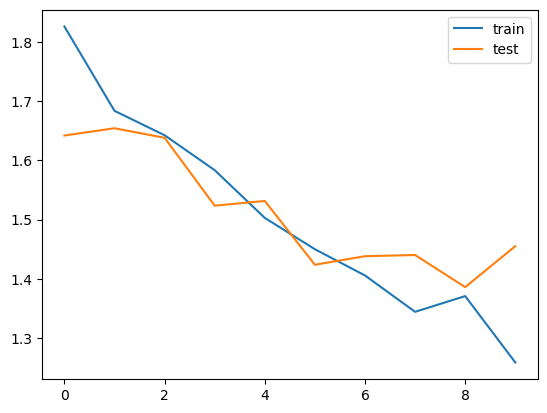

In [89]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [90]:
model2.evaluate(hand_X_test, hand_y_test)
y_pred = model.predict(hand_X_test)

352/352 [==============================] - 3s 9ms/step


In [91]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(hand_y_test,axis=1)
Y_pred = np.argmax(model2.predict(hand_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

352/352 [==============================] - 4s 9ms/step
Confusion Matrix
[[1672   53   27  621    0   82    0    0]
 [ 720   50   33  919    0  149    0    0]
 [ 309   17   38 1380    0  123    0    0]
 [ 364   23   70 2745    0  204    0    0]
 [   3    2    0   35    0    9    0    0]
 [ 229   22    6  810    0  281    0    0]
 [  12    2    0   64    0   82    0    0]
 [   5    1    0   24    0   70    0    0]]


In [92]:
%time
print(hand_X_test.shape,hand_y_test.shape)
base_loss,base_accuracy=model2.evaluate(hand_X_test,hand_y_test,batch_size=batch_size,verbose=1)

lstm2_file='/Users/kimjuhwan/Desktop/data/LSTM2_Model.h5'
  
tf.keras.models.save_model(model2, lstm2_file, include_optimizer=False)
print('model saved at ', lstm2_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 23.1 µs
(11256, 40, 13) (11256, 8)
352/352 [==============================] - 3s 9ms/step - loss: 1.5401 - acc: 0.4252
model saved at  /Users/kimjuhwan/Desktop/data/LSTM2_Model.h5
Accuracy >42.519546
Base Loss >1.54


In [93]:
base2_model = keras.models.load_model(lstm2_file)

In [94]:
base2_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 256)              145408    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 179,336
Trainable params: 179,336
Non-trainable params: 0
_________________________________________________________________


In [99]:
new2_model = keras.models.Sequential(base2_model.layers[:-1])
base2_model.trainable = False

new2_model.add(keras.layers.Flatten())
new2_model.add(keras.layers.Dense(8, activation="sigmoid"))

In [100]:
new2_model.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history3 = new2_model.fit(chest_X_train, chest_y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new2_model.summary()

Epoch 1/10
17/17 [==============================] - 2s 36ms/step - loss: 0.8055 - accuracy: 0.0906 - val_loss: 0.8109 - val_accuracy: 0.1017
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.7935 - accuracy: 0.0736 - val_loss: 0.8024 - val_accuracy: 0.1017
Epoch 3/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7883 - accuracy: 0.0849 - val_loss: 0.7940 - val_accuracy: 0.1017
Epoch 4/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7784 - accuracy: 0.1075 - val_loss: 0.7859 - val_accuracy: 0.1017
Epoch 5/10
17/17 [==============================] - 0s 12ms/step - loss: 0.7688 - accuracy: 0.1189 - val_loss: 0.7780 - val_accuracy: 0.1017
Epoch 6/10
17/17 [==============================] - 0s 11ms/step - loss: 0.7607 - accuracy: 0.1113 - val_loss: 0.7702 - val_accuracy: 0.1017
Epoch 7/10
17/17 [==============================] - 0s 11ms/step - loss: 0.7543 - accuracy: 0.0868 - val_loss: 0.7626 - val_accuracy: 0.1017
Epoch 8/10
17

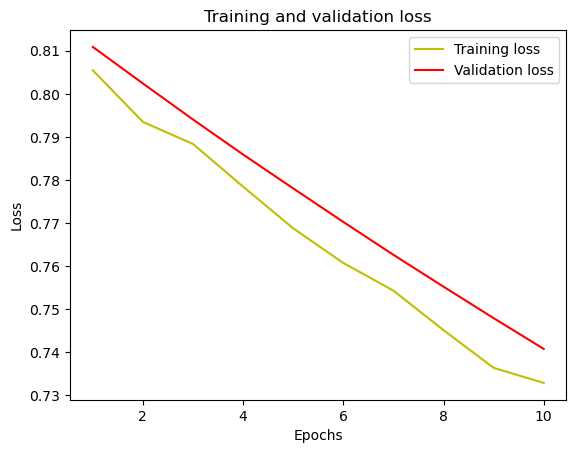

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

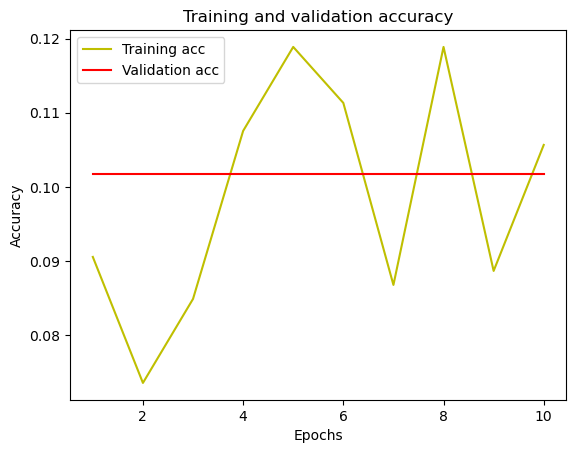

In [102]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
new2_model.evaluate(chest_X_test, chest_y_test)
y_pred = new2_model.predict(chest_X_test)

352/352 [==============================] - 4s 9ms/step


In [104]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(chest_y_test,axis=1)
Y_pred = np.argmax(new2_model.predict(chest_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

352/352 [==============================] - 3s 9ms/step
Confusion Matrix
[[   0   88    2  296    0 1275    2  792]
 [   0   93    0  315    0  431    3 1029]
 [   0   92    0  386    0  426    2  961]
 [   0  163    1  752    0  589    0 1901]
 [   0    1    0   10    0    4    0   34]
 [   0   85    0  412    0  170    0  681]
 [   0   17    0   76    0   21    0   46]
 [   0    7    0   58    0    8    0   27]]
